### In this module we compare the prices and comsumption through the years 
Thsi also includes synthetic data

In [22]:
## Linear Regressor

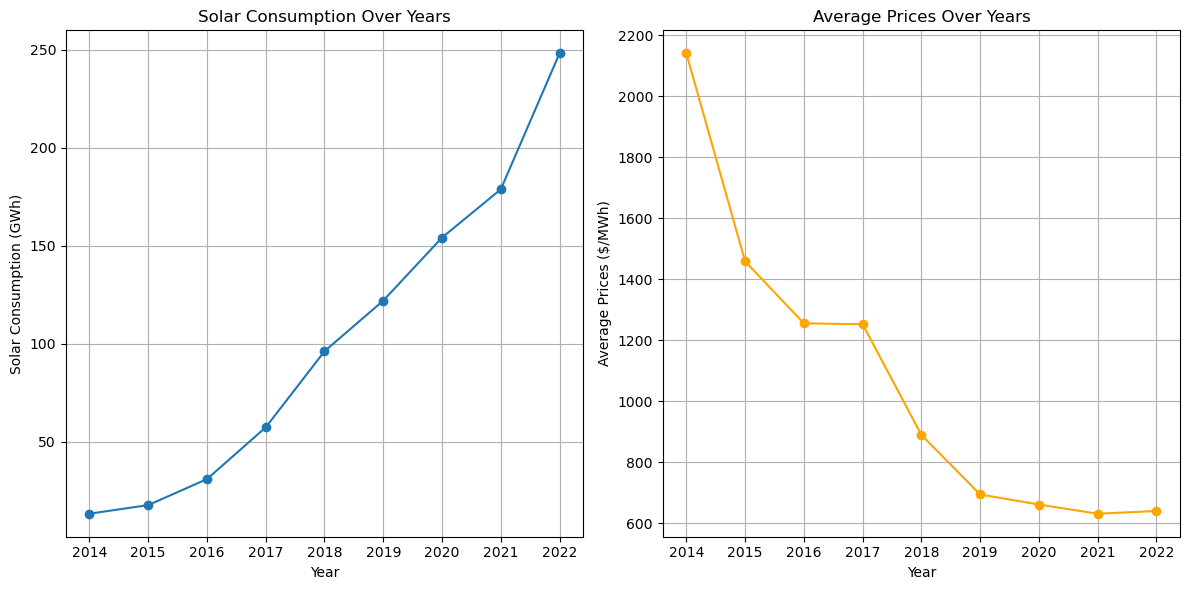

Linear Regression CV MSE: 1071.23


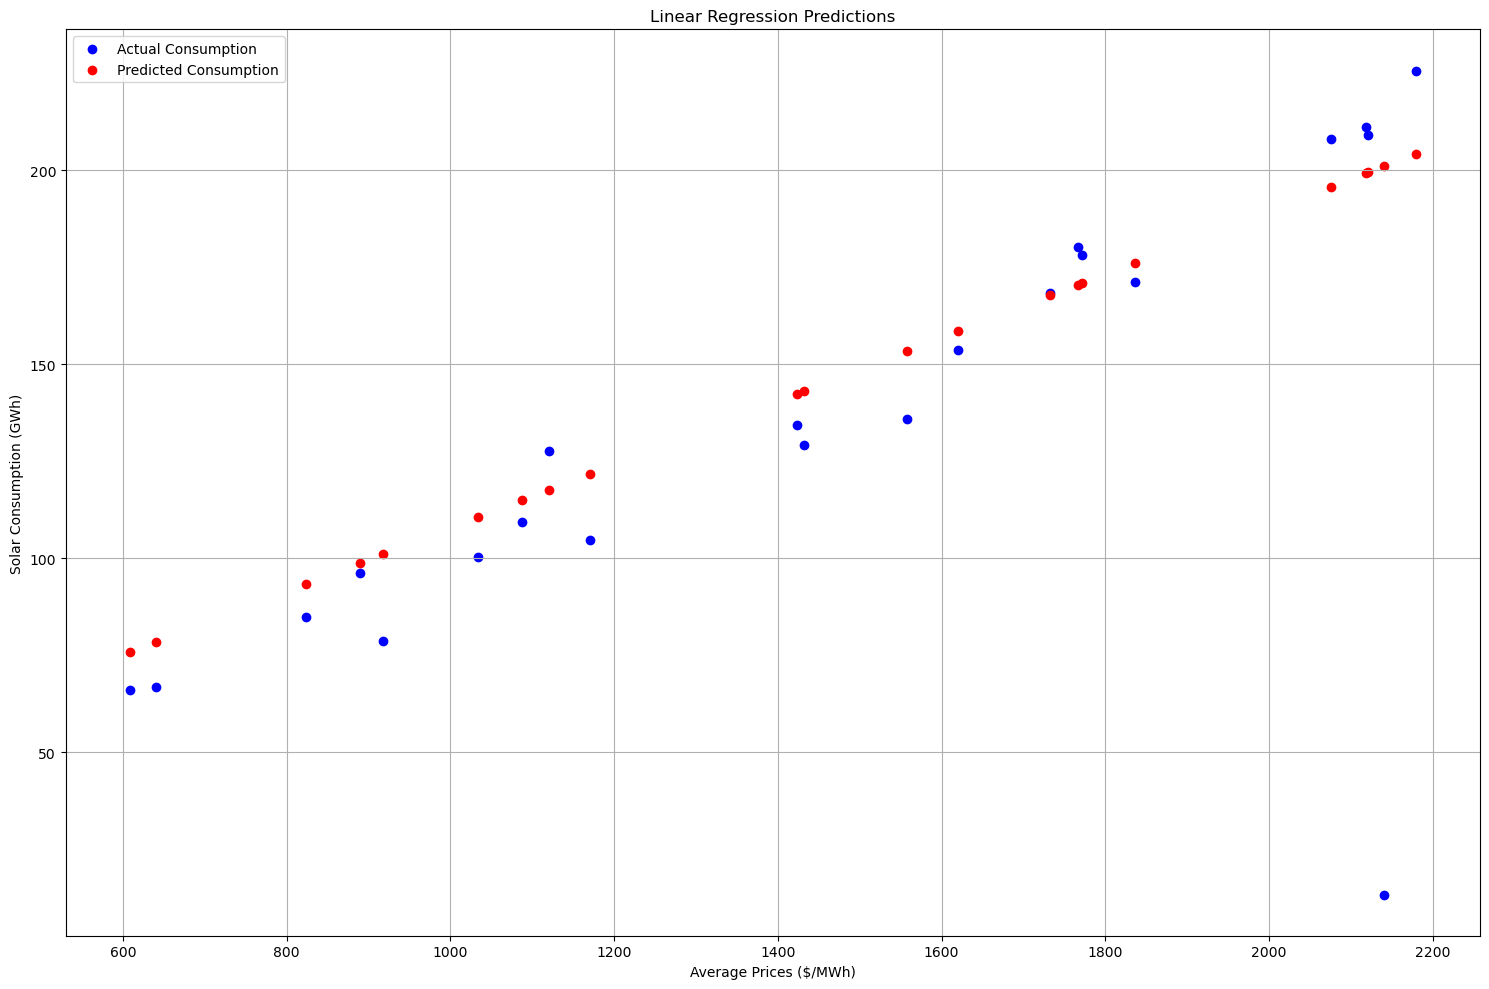


Linear Regression Metrics:
MSE: 1735.88
MAE: 18.52
R²: 0.42


C:\Users\shriy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


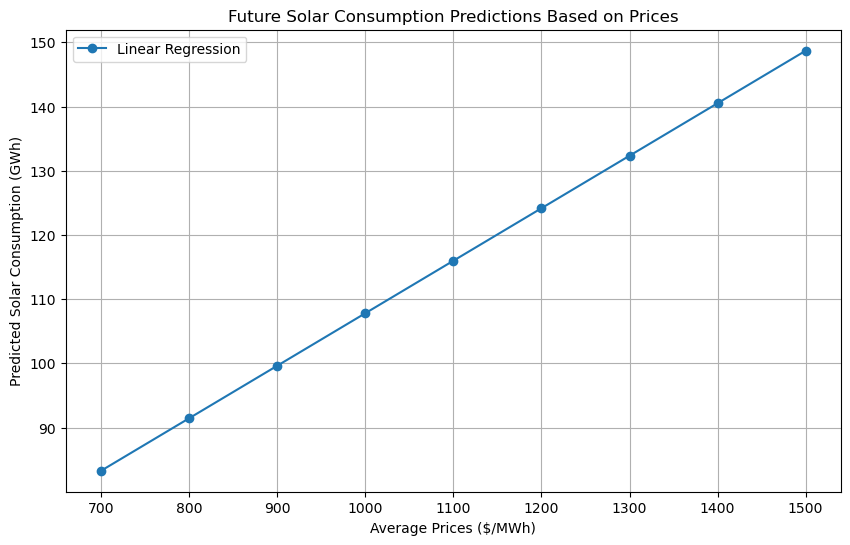


Future Consumption Predictions:

Linear Regression Predictions for Future Prices:
Price: Rs700, Predicted Solar Consumption: 83.28 GWh
Price: Rs800, Predicted Solar Consumption: 91.45 GWh
Price: Rs900, Predicted Solar Consumption: 99.63 GWh
Price: Rs1000, Predicted Solar Consumption: 107.81 GWh
Price: Rs1100, Predicted Solar Consumption: 115.98 GWh
Price: Rs1200, Predicted Solar Consumption: 124.16 GWh
Price: Rs1300, Predicted Solar Consumption: 132.34 GWh
Price: Rs1400, Predicted Solar Consumption: 140.51 GWh
Price: Rs1500, Predicted Solar Consumption: 148.69 GWh


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

existing_data = pd.DataFrame({
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'solar_consumption': [13.299, 17.683, 30.936, 57.336, 96.123, 121.960, 154.120, 178.734, 248.090],
    'Solar_Power_generated': [2821.91, 1171.62, 3130.36, 5658.63, 9563.69, 6750.97, 6510.06, 5628.80, 12760.50],
    'LCOE': [0.1323, 0.0866, 0.0817, 0.0746, 0.0541, 0.0428, 0.0406, 0.0367, 0.0374],
    'Prices_Avg': [2140, 1458, 1255, 1252, 889, 694, 661, 631, 640]
})

# Visualize the existing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(existing_data['Year'], existing_data['solar_consumption'], marker='o', label='Solar Consumption (GWh)')
plt.title('Solar Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Solar Consumption (GWh)')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(existing_data['Year'], existing_data['Prices_Avg'], marker='o', color='orange', label='Average Prices ($/MWh)')
plt.title('Average Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Average Prices ($/MWh)')
plt.grid()

plt.tight_layout()
plt.show()

# Generate synthetic data\
np.random.seed(42)
n_samples = 100
synthetic_prices = np.random.uniform(low=600, high=2200, size=n_samples)
synthetic_consumption = 0.1 * synthetic_prices + np.random.normal(loc=0, scale=10, size=n_samples)

synthetic_data = pd.DataFrame({
    'Prices_Avg': synthetic_prices,
    'solar_consumption': synthetic_consumption
})
#combining datasets
data = pd.concat([existing_data[['Prices_Avg', 'solar_consumption']], synthetic_data], ignore_index=True)

#model training and testing
X = data[['Prices_Avg']]
y = data['solar_consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
}


metrics = {}

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} CV MSE: {-np.mean(cv_scores):.2f}")

    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics[name] = {'MSE': mse, 'MAE': mae, 'R²': r2}

    # Plot predictions
    plt.subplot(len(models), 1, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='Actual Consumption')
    plt.scatter(X_test, y_pred, color='red', label='Predicted Consumption')
    plt.title(f'{name} Predictions')
    plt.xlabel('Average Prices ($/MWh)')
    plt.ylabel('Solar Consumption (GWh)')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Display metrics
for name, metric in metrics.items():
    print(f"\n{name} Metrics:")
    print(f"MSE: {metric['MSE']:.2f}")
    print(f"MAE: {metric['MAE']:.2f}")
    print(f"R²: {metric['R²']:.2f}")

# Predict future consumption
future_prices = np.array([[700], [800], [900], [1000], [1100], [1200], [1300], [1400], [1500]])  # Example future prices
predictions = {}

for name, model in models.items():
    preds = model.predict(future_prices)
    predictions[name] = preds
    
plt.figure(figsize=(10, 6))
for name, preds in predictions.items():
    plt.plot(future_prices, preds, marker='o', label=name)

plt.title('Future Solar Consumption Predictions Based on Prices')
plt.xlabel('Average Prices ($/MWh)')
plt.ylabel('Predicted Solar Consumption (GWh)')
plt.legend()
plt.grid()
plt.show()
# Display future predictions
print("\nFuture Consumption Predictions:")
for name, preds in predictions.items():
    print(f"\n{name} Predictions for Future Prices:")
    for price, pred in zip(future_prices, preds):
        print(f"Price: Rs{price[0]}, Predicted Solar Consumption: {pred:.2f} GWh")


## Random Forest Regressor


Random Forest Regressor Metrics:
MSE: 2803.55
MAE: 25.63
R²: 0.06


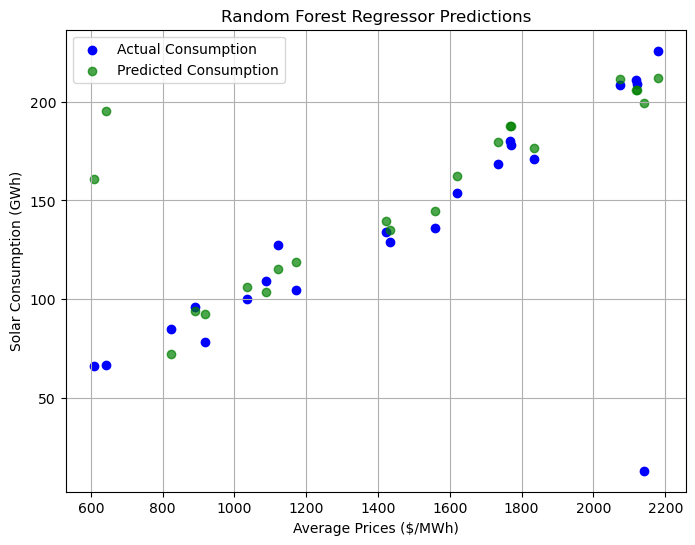

C:\Users\shriy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


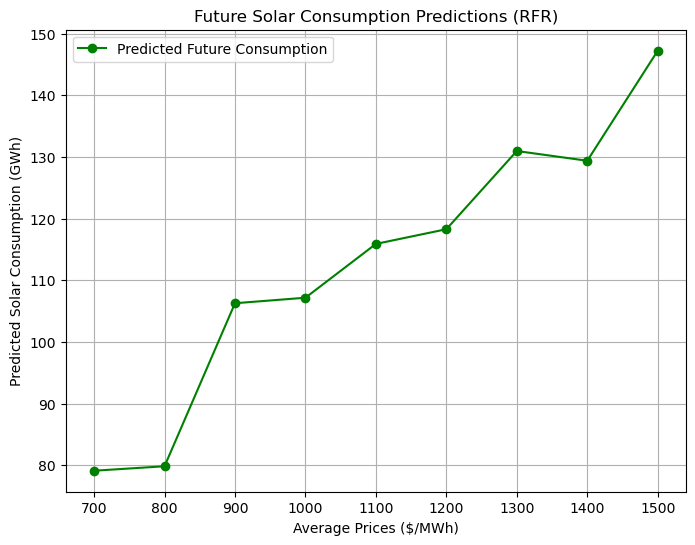


Random Forest Regressor Predictions for Future Prices:
Price: Rs700, Predicted Solar Consumption: 79.10 GWh
Price: Rs800, Predicted Solar Consumption: 79.82 GWh
Price: Rs900, Predicted Solar Consumption: 106.27 GWh
Price: Rs1000, Predicted Solar Consumption: 107.17 GWh
Price: Rs1100, Predicted Solar Consumption: 115.90 GWh
Price: Rs1200, Predicted Solar Consumption: 118.28 GWh
Price: Rs1300, Predicted Solar Consumption: 130.97 GWh
Price: Rs1400, Predicted Solar Consumption: 129.39 GWh
Price: Rs1500, Predicted Solar Consumption: 147.24 GWh


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Existing dataset based on the data you provided
existing_data = pd.DataFrame({
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'solar_consumption': [13.299, 17.683, 30.936, 57.336, 96.123, 121.960, 154.120, 178.734, 248.090],
    'Solar_Power_generated': [2821.91, 1171.62, 3130.36, 5658.63, 9563.69, 6750.97, 6510.06, 5628.80, 12760.50],
    'LCOE': [0.1323, 0.0866, 0.0817, 0.0746, 0.0541, 0.0428, 0.0406, 0.0367, 0.0374],
    'Prices_Avg': [2140, 1458, 1255, 1252, 889, 694, 661, 631, 640]
})

np.random.seed(42)  
n_samples = 100
synthetic_prices = np.random.uniform(low=600, high=2200, size=n_samples)
synthetic_consumption = 0.1 * synthetic_prices + np.random.normal(loc=0, scale=10, size=n_samples)

synthetic_data = pd.DataFrame({
    'Prices_Avg': synthetic_prices,
    'solar_consumption': synthetic_consumption
})


data = pd.concat([existing_data[['Prices_Avg', 'solar_consumption']], synthetic_data], ignore_index=True)

X = data[['Prices_Avg']]
y = data['solar_consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nRandom Forest Regressor Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Consumption')
plt.scatter(X_test, y_pred, color='green', label='Predicted Consumption', alpha=0.7)
plt.title('Random Forest Regressor Predictions')
plt.xlabel('Average Prices ($/MWh)')
plt.ylabel('Solar Consumption (GWh)')
plt.legend()
plt.grid()
plt.show()

# Predict future consumption
future_prices = np.array([[700], [800], [900], [1000], [1100], [1200], [1300], [1400], [1500]])  # Example future prices
future_predictions = rfr.predict(future_prices)

# Plot future predictions
plt.figure(figsize=(8, 6))
plt.plot(future_prices, future_predictions, marker='o', label='Predicted Future Consumption', color='green')
plt.title('Future Solar Consumption Predictions (RFR)')
plt.xlabel('Average Prices ($/MWh)')
plt.ylabel('Predicted Solar Consumption (GWh)')
plt.grid()
plt.legend()
plt.show()

# Print future predictions
print("\nRandom Forest Regressor Predictions for Future Prices:")
for price, pred in zip(future_prices, future_predictions):
    print(f"Price: Rs{price[0]}, Predicted Solar Consumption: {pred:.2f} GWh")


## Using Ensemble for better results in prediction

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize models
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)

# Simple averaging of predictions
y_pred_ensemble = (y_pred_lr + y_pred_rfr) / 2

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print("\nEnsemble Model Metrics (Simple Averaging):")
print(f"MSE: {mse_ensemble:.2f}")
print(f"MAE: {mae_ensemble:.2f}")
print(f"R²: {r2_ensemble:.2f}")



Ensemble Model Metrics (Simple Averaging):
MSE: 2009.67
MAE: 20.50
R²: 0.33


## Stacking ensemble Model

In [16]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Create base models
estimators = [
    ('linear_reg', LinearRegression()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stacking_model.predict(X_test)

# Calculate metrics for the stacking ensemble
mse_stack = mean_squared_error(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Print stacking ensemble metrics
print("\nStacking Ensemble Model Metrics:")
print(f"MSE: {mse_stack:.2f}")
print(f"MAE: {mae_stack:.2f}")
print(f"R²: {r2_stack:.2f}")



Stacking Ensemble Model Metrics:
MSE: 2333.05
MAE: 23.34
R²: 0.22


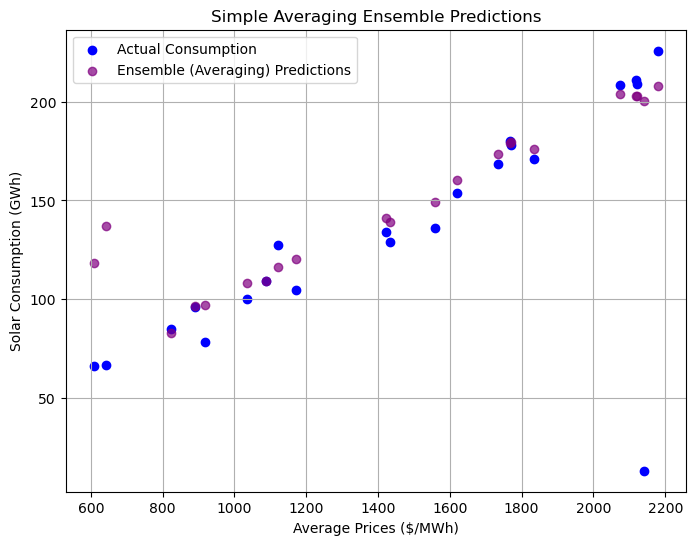

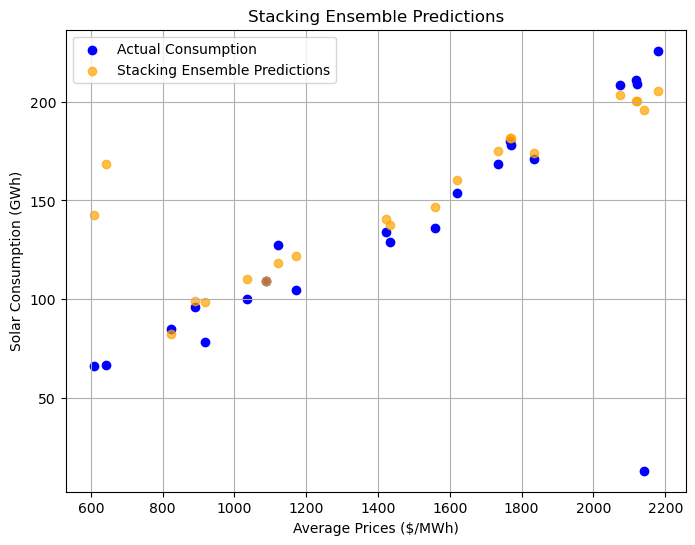


Ensemble Model Metrics (Simple Averaging):
MSE: 2009.67
MAE: 20.50
R²: 0.33

Stacking Ensemble Model Metrics:
MSE: 2333.05
MAE: 23.34
R²: 0.22


In [18]:
import matplotlib.pyplot as plt

# Plotting for Simple Averaging Ensemble
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Consumption')
plt.scatter(X_test, y_pred_ensemble, color='purple', label='Ensemble (Averaging) Predictions', alpha=0.7)
plt.title('Simple Averaging Ensemble Predictions')
plt.xlabel('Average Prices ($/MWh)')
plt.ylabel('Solar Consumption (GWh)')
plt.legend()
plt.grid()
plt.show()

# Plotting for Stacking Ensemble
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Consumption')
plt.scatter(X_test, y_pred_stack, color='orange', label='Stacking Ensemble Predictions', alpha=0.7)
plt.title('Stacking Ensemble Predictions')
plt.xlabel('Average Prices ($/MWh)')
plt.ylabel('Solar Consumption (GWh)')
plt.legend()
plt.grid()
plt.show()

# Print ensemble model metrics for comparison
print("\nEnsemble Model Metrics (Simple Averaging):")
print(f"MSE: {mse_ensemble:.2f}")
print(f"MAE: {mae_ensemble:.2f}")
print(f"R²: {r2_ensemble:.2f}")
print("\nStacking Ensemble Model Metrics:")
print(f"MSE: {mse_stack:.2f}")
print(f"MAE: {mae_stack:.2f}")
print(f"R²: {r2_stack:.2f}")
